<a href="https://colab.research.google.com/github/Stefinshibygeorge/Deep_Learning_with_Tensorflow-/blob/main/Binary_Image_Classification_with_Tensorflow/CNN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the modules

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [ ]:
tf.__version__,pd.__version__,np.__version__

('2.12.0', '1.5.3', '1.23.5')

## Get Data

####Load the zip file to the current working directory and unzip and extract them

   #### Unzip all the files and extract them

In [ ]:
import zipfile

zipped_file = zipfile.ZipFile("pizza_steak.zip")
zipped_file.extractall()
zipped_file.close()

In [ ]:
data_set = "pizza_steak"

#### list the dataset

In [ ]:
!ls pizza_steak

test  train  validation


In [ ]:
!ls pizza_steak/train

pizza  steak


#### Walk through the dataset

In [ ]:
for dir_path,dir_names,file_names in os.walk(data_set):
  print(f'There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}')

There are 4 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/validation
There are 0 directories and 250 images in pizza_steak/validation/pizza
There are 0 directories and 250 images in pizza_steak/validation/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 0 images in pizza_steak/.ipynb_checkpoints


In [ ]:
from Stefin_functions import walk_through_dir
walk_through_dir(data_set)

#### Get the list of class_names

Method 1:

🔑 use 1 in case of extra DS image

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(f'{data_set}/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[0:]  # use 1 in case of extra DS image
print(class_names)

['pizza' 'steak']


In [ ]:
len(class_names)

2

Method 2:

In [ ]:
class_names = sorted(os.listdir(f'{data_set}/train'))
class_names

['pizza', 'steak']

In [ ]:
len(class_names)

2

### Visualise the Images

Image shape: (384, 512, 3)


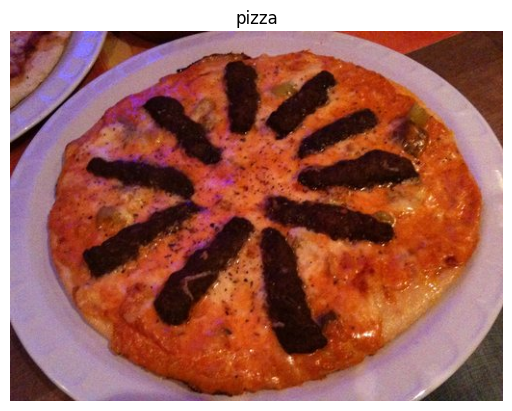

In [ ]:
from Stefin_functions import view_random_image

# view random image from any random class

rand_img = view_random_image(f'{data_set}/train',class_names[random.randint(0,len(class_names))])

In [ ]:
rand_img.shape


(384, 512, 3)

In [ ]:
rand_img

array([[[138,  79,  81],
        [153,  94,  96],
        [152,  91,  96],
        ...,
        [ 75,  29,  31],
        [ 76,  27,  31],
        [ 73,  24,  28]],

       [[131,  71,  73],
        [138,  78,  80],
        [148,  87,  92],
        ...,
        [ 78,  32,  32],
        [ 78,  29,  32],
        [ 74,  25,  28]],

       [[134,  72,  75],
        [142,  80,  83],
        [145,  83,  88],
        ...,
        [ 77,  32,  29],
        [ 73,  27,  27],
        [ 68,  22,  22]],

       ...,

       [[ 68,  31,  39],
        [ 72,  35,  43],
        [ 69,  32,  40],
        ...,
        [ 74,  63,  57],
        [ 78,  64,  63],
        [ 83,  69,  69]],

       [[ 66,  31,  38],
        [ 67,  32,  39],
        [ 63,  28,  35],
        ...,
        [ 77,  67,  58],
        [ 81,  67,  64],
        [ 84,  70,  69]],

       [[ 73,  38,  45],
        [ 72,  37,  44],
        [ 69,  34,  41],
        ...,
        [ 75,  65,  56],
        [ 80,  66,  63],
        [ 82,  68,  67]]

### Normalise the pixels between 0 and 255





In [ ]:
28/255

0.10980392156862745

In [ ]:
rand_img = (rand_img/255.0)
rand_img

array([[[0.54117647, 0.30980392, 0.31764706],
        [0.6       , 0.36862745, 0.37647059],
        [0.59607843, 0.35686275, 0.37647059],
        ...,
        [0.29411765, 0.11372549, 0.12156863],
        [0.29803922, 0.10588235, 0.12156863],
        [0.28627451, 0.09411765, 0.10980392]],

       [[0.51372549, 0.27843137, 0.28627451],
        [0.54117647, 0.30588235, 0.31372549],
        [0.58039216, 0.34117647, 0.36078431],
        ...,
        [0.30588235, 0.1254902 , 0.1254902 ],
        [0.30588235, 0.11372549, 0.1254902 ],
        [0.29019608, 0.09803922, 0.10980392]],

       [[0.5254902 , 0.28235294, 0.29411765],
        [0.55686275, 0.31372549, 0.3254902 ],
        [0.56862745, 0.3254902 , 0.34509804],
        ...,
        [0.30196078, 0.1254902 , 0.11372549],
        [0.28627451, 0.10588235, 0.10588235],
        [0.26666667, 0.08627451, 0.08627451]],

       ...,

       [[0.26666667, 0.12156863, 0.15294118],
        [0.28235294, 0.1372549 , 0.16862745],
        [0.27058824, 0

##Preprocess Data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_data = f'/content/{data_set}/train'
valid_data = f'/content/{data_set}/validation'

train_data_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          seed = 42,
                                                                          class_mode = "categorical",
                                                                          shuffle = "True")
valid_data_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          class_mode = "categorical",
                                                                          seed = 42,
                                                                          shuffle = "True")
train_data_gen



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


##Create Model

In [ ]:
size = len(class_names)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = size,
                    kernel_size = 3,
                    activation = "relu",
                    input_shape = (224,224,3),
                    ),
    tf.keras.layers.Conv2D(size,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                       padding = "valid"),
    tf.keras.layers.Conv2D(size,3,activation = "relu"),
    tf.keras.layers.Conv2D(size,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(size,activation = "softmax")
])

##Compile the model

In [ ]:
model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics=["accuracy"]
)

In [ ]:
history  = model_1.fit(
    train_data_gen,
    epochs = 5,
    steps_per_epoch = len(train_data_gen),
    validation_data = valid_data_gen,
    validation_steps = len(valid_data_gen),
)

history

Epoch 1/5
47/47 [==============================] - 21s 161ms/step - loss: 0.6836 - accuracy: 0.5233 - val_loss: 0.6467 - val_accuracy: 0.6480
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6338 - accuracy: 0.6607 - val_loss: 0.5976 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.5884 - accuracy: 0.7020 - val_loss: 0.5891 - val_accuracy: 0.6660
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.5520 - accuracy: 0.7227 - val_loss: 0.5798 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.5103 - accuracy: 0.7647 - val_loss: 0.5865 - val_accuracy: 0.7080


1/1 [==============================] - 0s 248ms/step
[[0.41052544 0.5894745 ]]


'pizza'

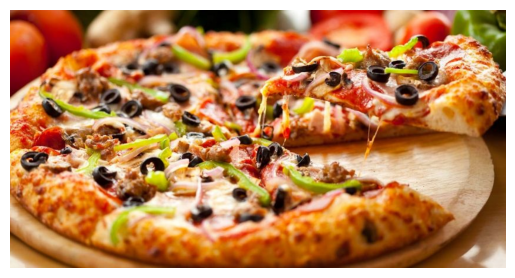

In [ ]:
image_name = "pizza.jpeg"
image = mpimg.imread(image_name)
plt.imshow(image)
plt.axis(False);

from helper_functions import load_and_prep_image

image = load_and_prep_image("pizza.jpeg")
img = tf.expand_dims(image,axis = 0)

pred = model_1.predict(img)
print(pred)

pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 2)       56        
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 2)       38        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 2)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 2)       38        
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 2)       38        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 2)        0         
 2D)                                                    

## Modify the model

### Preprocess with Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_data = f'/content/{data_set}/train'
valid_data = f'/content/{data_set}/validation'


train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,).flow_from_directory(train_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          seed = 42,
                                                                          class_mode = "categorical",
                                                                          shuffle = "True")
valid_data_gen= ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          class_mode = "categorical",
                                                                          seed = 42,
                                                                          shuffle = "True")
train_data_gen



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = size,
                    kernel_size = 3,
                    activation = "relu",
                    input_shape = (224,224,3),
                    ),
    tf.keras.layers.Conv2D(size,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                       padding = "valid"),
    tf.keras.layers.Conv2D(size,3,activation = "relu"),
    tf.keras.layers.Conv2D(size,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(size,activation = "softmax")
])

In [ ]:
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics=["accuracy"]
)

In [ ]:
history_2  = model_2.fit(
    train_data_gen,
    epochs = 5,
    steps_per_epoch = len(train_data_gen),
    validation_data = valid_data_gen,
    validation_steps = len(valid_data_gen),
)

history_2

Epoch 1/5
47/47 [==============================] - 26s 483ms/step - loss: 0.6904 - accuracy: 0.4940 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6768 - accuracy: 0.5080 - val_loss: 0.6611 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6517 - accuracy: 0.5807 - val_loss: 0.6077 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5579 - accuracy: 0.7313 - val_loss: 0.4877 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5217 - accuracy: 0.7527 - val_loss: 0.4646 - val_accuracy: 0.8000


1/1 [==============================] - 0s 79ms/step
[[0.5215091  0.47849083]]


'steak'

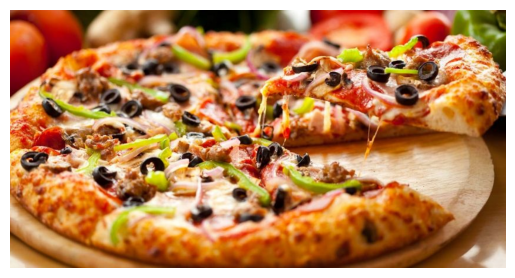

In [ ]:
image_name = "pizza.jpeg"
image = mpimg.imread(image_name)
plt.imshow(image)
plt.axis(False);

from helper_functions import load_and_prep_image

image = load_and_prep_image("pizza.jpeg")
img = tf.expand_dims(image,axis = 0)

pred = model_2.predict(img)
print(pred)

pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class


## Transfer Learning with Tenserflow Hub

Eg)

*   Resnet
*   Efficent net



### Preprocess data (no data aug)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_data = f'/content/{data_set}/train'
valid_data = f'/content/{data_set}/validation'

train_data_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          seed = 42,
                                                                          class_mode = "categorical",
                                                                          shuffle = "True")
valid_data_gen= ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          class_mode = "categorical",
                                                                          seed = 42,
                                                                          shuffle = "True")
train_data_gen

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

#### Try the efficent net url

In [ ]:
import tensorflow_hub as hub

model_3 = tf.keras.Sequential([
    hub.KerasLayer(efficientnet_url,
                   trainable = False,
                   input_shape = (224,224,3)),
    tf.keras.layers.Dense(size,activation = "softmax",name = "output_layer")
])

In [ ]:
model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics=["accuracy"]
)

In [ ]:
history_3  = model_3.fit(
    train_data_gen,
    epochs = 5,
    steps_per_epoch = len(train_data_gen),
    validation_data = valid_data_gen,
    validation_steps = len(valid_data_gen),
)

history_3

Epoch 1/5
47/47 [==============================] - 22s 218ms/step - loss: 0.1871 - accuracy: 0.9540 - val_loss: 0.0471 - val_accuracy: 0.9940
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.0337 - val_accuracy: 0.9940
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.0591 - accuracy: 0.9840 - val_loss: 0.0282 - val_accuracy: 0.9940
Epoch 4/5
47/47 [==============================] - 8s 160ms/step - loss: 0.0493 - accuracy: 0.9880 - val_loss: 0.0265 - val_accuracy: 0.9960
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.0427 - accuracy: 0.9893 - val_loss: 0.0244 - val_accuracy: 0.9940


--2023-08-18 18:22:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-08-18 18:22:04 (32.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



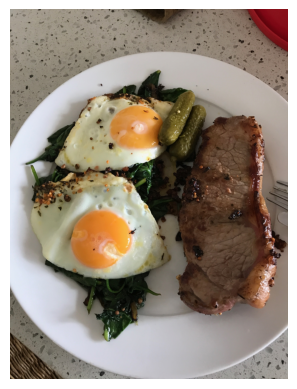

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
image_name = "03-steak.jpeg"
image = mpimg.imread(image_name)
plt.imshow(image)
plt.axis(False);

In [ ]:
from helper_functions import load_and_prep_image

image = load_and_prep_image("03-steak.jpeg")
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
image.shape

TensorShape([224, 224, 3])

In [ ]:
img = tf.expand_dims(image,axis = 0)
img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_3.predict(img)
pred

1/1 [==============================] - 2s 2s/step


array([[3.724152e-04, 9.996276e-01]], dtype=float32)

In [ ]:
pred.sum() # sum of probablities = 1

1.0

In [ ]:
print(tf.math.argmax(tf.round(pred)[0]))

tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
class_names

['pizza', 'steak']

In [ ]:
pred_class = class_names[tf.math.argmax(tf.round(pred)[0])]
pred_class

'steak'

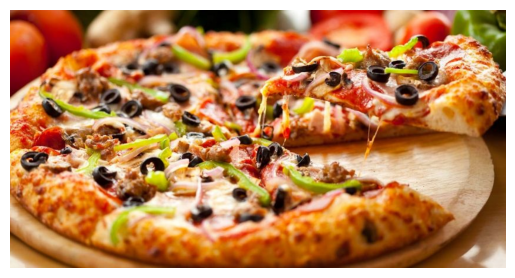

In [ ]:
image_name = "pizza.jpeg"
image = mpimg.imread(image_name)
plt.imshow(image)
plt.axis(False);

In [ ]:
from helper_functions import load_and_prep_image

image = load_and_prep_image("pizza.jpeg")
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6158578 , 0.34197304, 0.28642693],
        [0.65202206, 0.34821898, 0.24026814],
        [0.6631643 , 0.33010235, 0.18527567],
        ...,
        [0.15984789, 0.07749496, 0.00474504],
        [0.19181561, 0.10946267, 0.02710973],
        [0.18700102, 0.10580868, 0.01997393]],

       [[0.6047599 , 0.32831755, 0.25554097],
        [0.61862135, 0.31101725, 0.19178312],
        [0.603945  , 0.27064076, 0.12593521],
        ...,
        [0.14887087, 0.07828263, 0.        ],
        [0.16904762, 0.09586835, 0.        ],
        [0.17061447, 0.10310947, 0.        ]],

       [[0.57243526, 0.2916754 , 0.19239226],
        [0.5665515 , 0.2515508 , 0.13071603],
        [0.55000407, 0.20146419, 0.07119223],
        ...,
        [0.16749832, 0.10636386, 0.        ],
        [0.16880374, 0.11269109, 0.        ],
        [0.17353769, 0.1163248 , 0.        ]],

       ...,

       [[0.9591737 , 0.9317227 , 0.86113447],
        [0.95

In [ ]:
img = tf.expand_dims(image,axis = 0)
img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6158578 , 0.34197304, 0.28642693],
         [0.65202206, 0.34821898, 0.24026814],
         [0.6631643 , 0.33010235, 0.18527567],
         ...,
         [0.15984789, 0.07749496, 0.00474504],
         [0.19181561, 0.10946267, 0.02710973],
         [0.18700102, 0.10580868, 0.01997393]],

        [[0.6047599 , 0.32831755, 0.25554097],
         [0.61862135, 0.31101725, 0.19178312],
         [0.603945  , 0.27064076, 0.12593521],
         ...,
         [0.14887087, 0.07828263, 0.        ],
         [0.16904762, 0.09586835, 0.        ],
         [0.17061447, 0.10310947, 0.        ]],

        [[0.57243526, 0.2916754 , 0.19239226],
         [0.5665515 , 0.2515508 , 0.13071603],
         [0.55000407, 0.20146419, 0.07119223],
         ...,
         [0.16749832, 0.10636386, 0.        ],
         [0.16880374, 0.11269109, 0.        ],
         [0.17353769, 0.1163248 , 0.        ]],

        ...,

        [[0.9591737 , 0.9317227 , 

In [ ]:
pred = model_3.predict(img)
pred

1/1 [==============================] - 0s 31ms/step


array([[9.9977988e-01, 2.2011618e-04]], dtype=float32)

In [ ]:
pred_class = class_names[tf.math.argmax(tf.round(pred)[0])]
pred_class

'pizza'

1/1 [==============================] - 0s 51ms/step
[[9.9977988e-01 2.2011618e-04]]


'pizza'

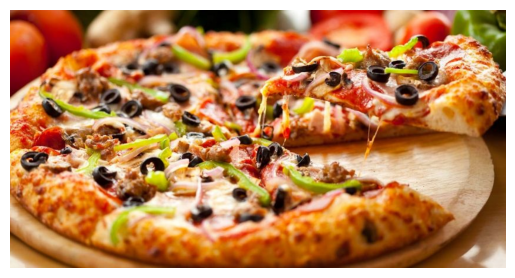

In [ ]:
image_name = "pizza.jpeg"
image = mpimg.imread(image_name)
plt.imshow(image)
plt.axis(False);

from helper_functions import load_and_prep_image

image = load_and_prep_image("pizza.jpeg")
img = tf.expand_dims(image,axis = 0)

pred = model_3.predict(img)
print(pred)

pred_class = class_names[tf.math.argmax(tf.round(pred)[0])]
pred_class


#### Select a random file from the test folder in the dataset and make predictions

Randomly selected file: 2157510.jpg
1/1 [==============================] - 0s 73ms/step
pizza


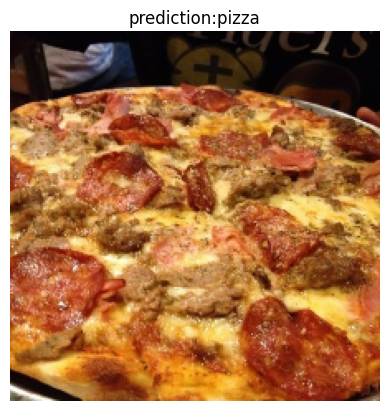

In [ ]:
import os
import random

folder_path = "/content/pizza_steak/test/pizza"  # Replace with the actual folder path

files = os.listdir(folder_path)
if files:
    random_image = random.choice(files)
    print("Randomly selected file:", random_image)
else:
    print("No files found in the folder.")

image_path = f"{folder_path}/{random_image}"

image = mpimg.imread(image_path)

from helper_functions import load_and_prep_image

image = load_and_prep_image(image_path)
img = tf.expand_dims(image,axis = 0)

pred = model_3.predict(img)
pred_class = class_names[tf.math.argmax(tf.round(pred)[0])]
print(pred_class)

plt.imshow(image)
plt.title(f'prediction:{pred_class}')
plt.axis(False);


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 4,052,126
Trainable params: 2,562
Non-trainable params: 4,049,564
_________________________________________________________________


#Binary classifiaction final code Model

In [ ]:
import zipfile
zipped_file = zipfile.ZipFile("pokemon_binary.zip")
zipped_file.extractall()
zipped_file.close()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import Stefin_functions
import helper_functions
import pathlib
import zipfile

#Use the below code to zip and extract data from a file
#zipped_file = zipfile.ZipFile("pokemon_binary.zip")
#zipped_file.extractall()
#zipped_file.close()

data_set = "pokemon_binary"
train_data = f'/content/{data_set}/train'
valid_data = f'/content/{data_set}/validation'

#walk through the directory
walk_through_dir(data_set)


#path of the image to be predicted
predict_path = "/content/pokemon_binary/test/pikachu"


#feature extraction url
feature_extraction_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"   #efficent net B0 feature vector


#get the class names
data_dir = pathlib.Path(f'{data_set}/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[0:]  # use 1 in case of extra DS image
#print(class_names)
class_names = sorted(os.listdir(f'{data_set}/train'))
class_size = len(class_names)



#preprocessing the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          seed = 42,
                                                                          class_mode = "categorical",
                                                                          shuffle = "True")
valid_data_gen= ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_data,
                                                                          batch_size = 32,
                                                                          target_size = (224,224),
                                                                          class_mode = "categorical",
                                                                          seed = 42,
                                                                          shuffle = "True")




#create a model
Model = tf.keras.Sequential([
    hub.KerasLayer(feature_extraction_url,
                   trainable = False,
                   input_shape = (224,224,3)),
    tf.keras.layers.Dense(size,activation = "softmax",name = "output_layer")
])



#Compile the model
Model.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics=["accuracy"]
    )

#fit the model
History  = model_3.fit(
    train_data_gen,
    epochs = 5,
    steps_per_epoch = len(train_data_gen),
    validation_data = valid_data_gen,
    validation_steps = len(valid_data_gen),
    )





Found 28 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 1.2469 - accuracy: 0.4643 - val_loss: 1.0148 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 146ms/step - loss: 1.0107 - accuracy: 0.4643 - val_loss: 0.9912 - val_accuracy: 0.7500
Epoch 3/5
1/1 [==============================] - 0s 187ms/step - loss: 0.7646 - accuracy: 0.5714 - val_loss: 0.9862 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 196ms/step - loss: 0.5892 - accuracy: 0.5714 - val_loss: 0.9251 - val_accuracy: 0.7500
Epoch 5/5
1/1 [==============================] - 0s 167ms/step - loss: 0.4488 - accuracy: 0.7857 - val_loss: 0.7874 - val_accuracy: 0.7500


In [ ]:
predict_path = f'/content/{data_set}/validation/charizard'
predict_path

'/content/pokemon_binary/validation/charizard'

Randomly selected file: charizard31.jpeg
1/1 [==============================] - 0s 37ms/step
pikachu


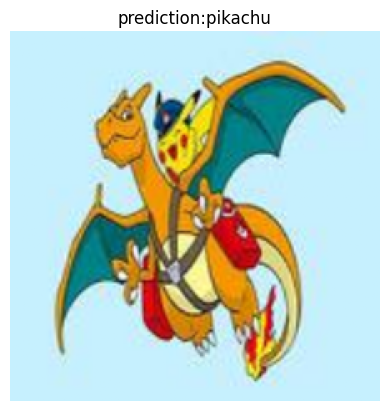

In [ ]:
# Make predictions randomly for an image in a folder
files = os.listdir(predict_path)
if files:
    random_image = random.choice(files)
    print("Randomly selected file:", random_image)
else:
    print("No files found in the folder.")

image_path = f"{predict_path}/{random_image}"

image = mpimg.imread(image_path)

from helper_functions import load_and_prep_image

image = load_and_prep_image(image_path)
img = tf.expand_dims(image,axis = 0)




pred = Model.predict(img)
pred_class = class_names[tf.math.argmax(tf.round(pred)[0])]
print(pred_class)
plt.imshow(image)
plt.title(f'prediction:{pred_class}')
plt.axis(False);




In [ ]:
predict_image = 'charizard.jpeg'

1/1 [==============================] - 1s 724ms/step
[[9.9999154e-01 8.4826770e-06]]


'charizard'

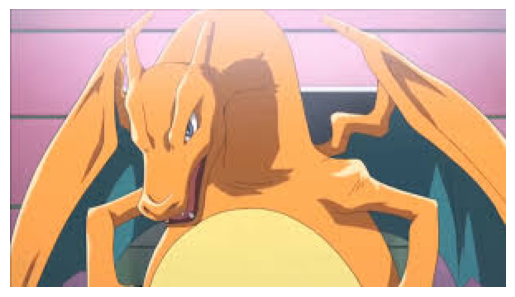

In [ ]:
image = mpimg.imread(predict_image)
plt.imshow(image)
plt.axis(False);

from helper_functions import load_and_prep_image

image = load_and_prep_image("charizard.jpeg")
img = tf.expand_dims(image,axis = 0)

pred = model_3.predict(img)
print(pred)

pred_class = class_names[tf.math.argmax(tf.round(pred)[0])]
pred_class